***Gender Classification with Python***\
*Machine Learning Project on Gender Classification with Python*

In this article, I’ll walk you through a machine learning project on gender classification with the Python programming language.

Dataset can be downloaded from kaggle website through the below link \
https://www.kaggle.com/ashishjangra27/gender-recognition-200k-images-celeba/download

This dataset consist of thousands of images for the male and female for training, validating and testing our machine learning model

In this project, I will use the some python libraries like **numpy, tensorflow and matplotlib** for building our machine learning model

**STEP-1 Importing the required libraries**

In [1]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

**STEP-2 Extracting the images from the dataset and Pre-processing the Images for the standard sizes**

we are not going to be able to manually upload images that are all the exact same shape and form, especially if we are trying to gather tens of thousands of images 
So, we are going to do prepare the data for the model

Keras actually has some functions that will automatically process the tons of data and generate a flow of batches from a directory, so it's called **ImageDataGenerator** and it's a part of prerocessing.

With this ImageDataGenerator, we are going to do some slight changes to the images to make it standard before training it to our machine learning model

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

test_datagen = ImageDataGenerator( rescale = 1.0/255)




Next, we want to generate many manipulated images directly from a directory 

In [4]:
train_generator = train_datagen.flow_from_directory("Data/Train/",
                                                    batch_size =256 ,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))

Found 160000 images belonging to 2 classes.


In [35]:
validation_generator =  test_datagen.flow_from_directory( "Data/Validation/",
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))

Found 22598 images belonging to 2 classes.


**STEP-3 Now we need to train and compile the deep neural network model for the task of Gender classification with Python**

I have used a very simple convolutional neural network architecture. The network uses 5 convolutional layers, 2 fully connected layers and a final output layer. The details of the layers are given below.

* Conv1 : The first convolutional layer has 96 nodes of kernel size 11.
* Conv2 : The second conv layer has 256 nodes with kernel size 11
* Conv3 : The third conv layer has 384 nodes with kernel size 3.
* Conv4 : The third conv layer has 384 nodes with kernel size 3.
* Conv5 : The third conv layer has 256 nodes with kernel size 3.
* The two fully connected layers have 4096 nodes each.

In [22]:
from keras.optimizers import Adam
model = tf.keras.models.Sequential([
    # 1st conv(input layers)
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  #To FC layer 2(output layers)
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

# parameters for training
model.compile(
    optimizer=Adam(lr=0.001), # learning rate for training
    loss='binary_crossentropy', # we are using the binary because our classification is either male or female
    metrics=['accuracy'] # to print the accuracy of our model during the training phase
   )
hist = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=30,
                    validation_steps=30,
                    epochs=30)



Epoch 1/30
30/30 [==============================] - 211s 7s/step - loss: 2.2511 - accuracy: 0.5579 - val_loss: 1.1503 - val_accuracy: 0.6053
Epoch 2/30
30/30 [==============================] - 280s 9s/step - loss: 0.6874 - accuracy: 0.5686 - val_loss: 0.6667 - val_accuracy: 0.6125
Epoch 3/30
30/30 [==============================] - 350s 12s/step - loss: 0.6742 - accuracy: 0.5971 - val_loss: 0.6670 - val_accuracy: 0.6160
Epoch 4/30
30/30 [==============================] - 365s 12s/step - loss: 0.6408 - accuracy: 0.6335 - val_loss: 0.6441 - val_accuracy: 0.6173
Epoch 5/30
30/30 [==============================] - 374s 12s/step - loss: 0.6010 - accuracy: 0.6882 - val_loss: 0.6731 - val_accuracy: 0.5885
Epoch 6/30
30/30 [==============================] - 368s 12s/step - loss: 0.5718 - accuracy: 0.7004 - val_loss: 0.5572 - val_accuracy: 0.7602
Epoch 7/30
30/30 [==============================] - 357s 12s/step - loss: 0.5710 - accuracy: 0.7040 - val_loss: 0.5566 - val_accuracy: 0.7174
Epoch 8/

In [7]:
from keras.models import load_model
model.save("gender_class2.h5")

**Step-4 finding the accuracy of our model**



Before testing this model let’s have a look at how the model performs in terms of accuracy



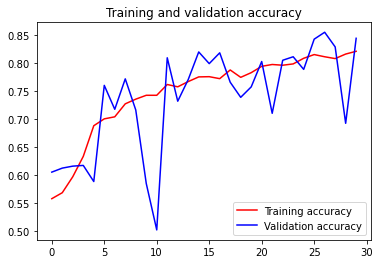

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt # to plot the graph
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()



We can see that model accuracy reaches around 80% during the training and the validation part

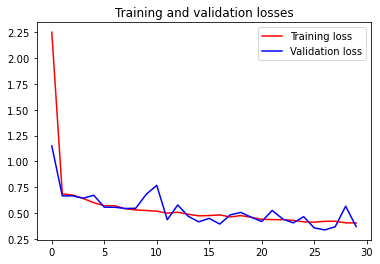

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.legend(loc=0)
plt.figure()
plt.show()


**Step-5 Testing the model**

Now let’s test our neural network model in both the cases of male and female:



[0.]
 is a female


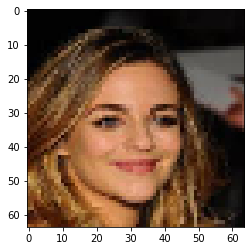

In [32]:

from keras.preprocessing import image # to porcess the image

# predicting images for female
path = "Data/Test/Female/160005.jpg"

img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("is a man")
else:
    print( " is a female")
plt.imshow(img)

In [33]:
classes

array([[0.]], dtype=float32)